In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("measurements.csv")

In [3]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
# Data Cleaning

# Replace comma with dot in 'consume' and 'temp_inside' and convert to float
data['consume'] = data['consume'].str.replace(',', '.').astype(float)
data['temp_inside'] = data['temp_inside'].str.replace(',', '.').astype(float)

In [5]:
# Impute missing values in 'temp_inside' with the median
data['temp_inside'].fillna(data['temp_inside'].median(), inplace=True)

In [6]:
# Replace missing values in 'specials' with 'None'
data['specials'].fillna('None', inplace=True)

In [7]:
# For 'refill liters' and 'refill gas', replace missing with '0' and 'No Refill' respectively
data['refill liters'].fillna('0', inplace=True)
data['refill gas'].fillna('No Refill', inplace=True)

In [8]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5.0,26,21.5,12,None,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,None,E10,0,0,0,0,No Refill
2,"11,2",5.5,38,21.5,15,None,E10,0,0,0,0,No Refill
3,"12,9",3.9,36,21.5,14,None,E10,0,0,0,0,No Refill
4,"18,5",4.5,46,21.5,15,None,E10,0,0,0,0,No Refill
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,None,SP98,0,0,0,0,No Refill
384,"16,1",4.3,38,25.0,31,AC,SP98,1,0,0,0,No Refill
385,16,3.8,45,25.0,19,None,SP98,0,0,0,0,No Refill
386,"15,4",4.6,42,25.0,31,AC,SP98,1,0,0,0,No Refill


## Exploratory Data Analysis

In [9]:
data.describe()

,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474
std,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441
min,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [10]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

### Plotting relationships and distributions

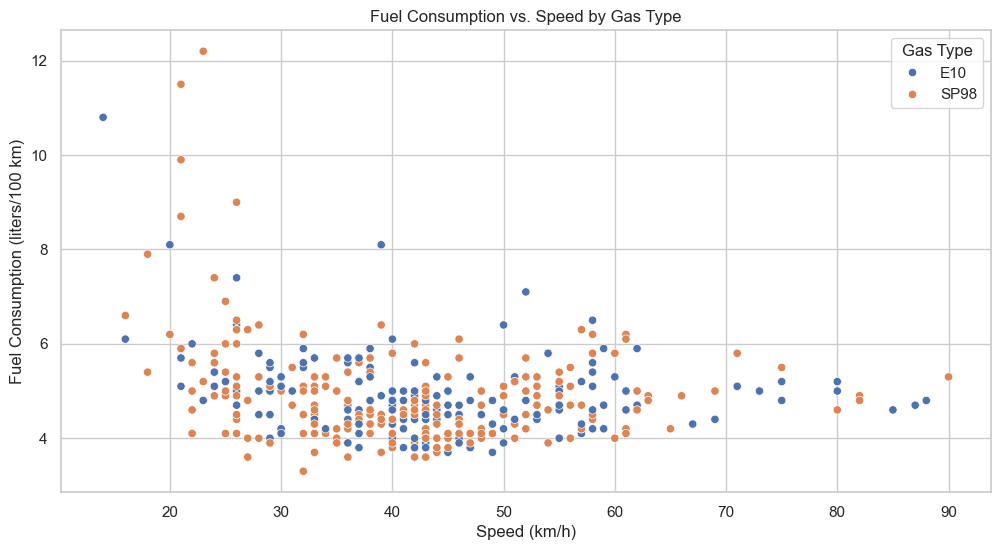

In [11]:
# Fuel consumption vs. speed
plt.figure(figsize=(12, 6))
sns.scatterplot(x='speed', y='consume', data=data, hue='gas_type')
plt.title('Fuel Consumption vs. Speed by Gas Type')
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel Consumption (liters/100 km)')
plt.legend(title='Gas Type')
plt.show()

fuel Consumption vs. Speed by Gas Type:

There doesn't appear to be a clear linear relationship between speed and fuel consumption. However, there are instances of higher fuel consumption at lower speeds, which could be due to various factors like traffic conditions or driving style.
Both gas types (E10 and the other type, presumably regular petrol) are represented across the range of speeds and consumptions.

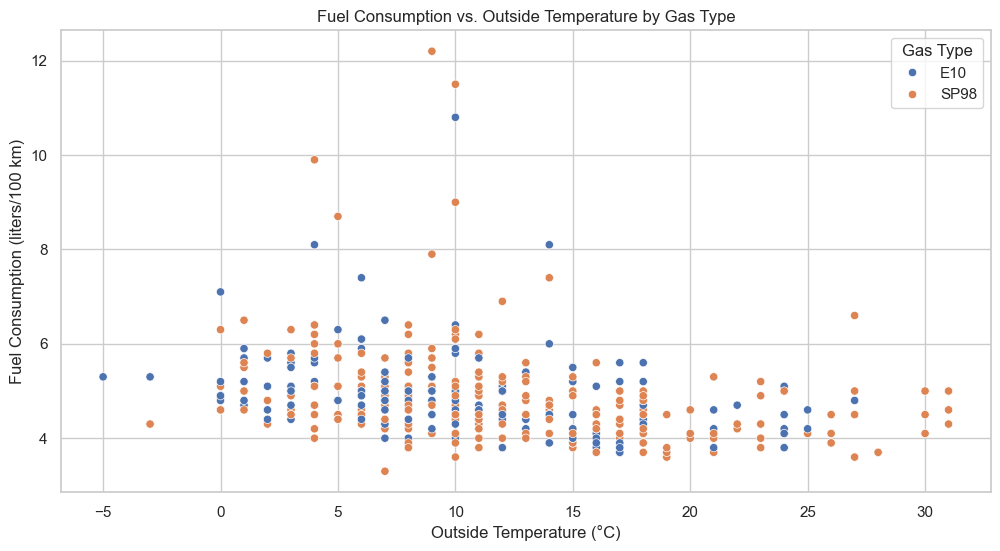

In [12]:
# Fuel consumption vs. temp_outside
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp_outside', y='consume', data=data, hue='gas_type')
plt.title('Fuel Consumption vs. Outside Temperature by Gas Type')
plt.xlabel('Outside Temperature (°C)')
plt.ylabel('Fuel Consumption (liters/100 km)')
plt.legend(title='Gas Type')
plt.show()

Fuel Consumption vs. Outside Temperature by Gas Type:

The fuel consumption seems to be lower at moderate outside temperatures and higher at extreme temperatures, both low and high. This might be due to the use of heating or air conditioning under extreme weather conditions.
Similar to the speed analysis, both gas types are used across various outside temperatures.

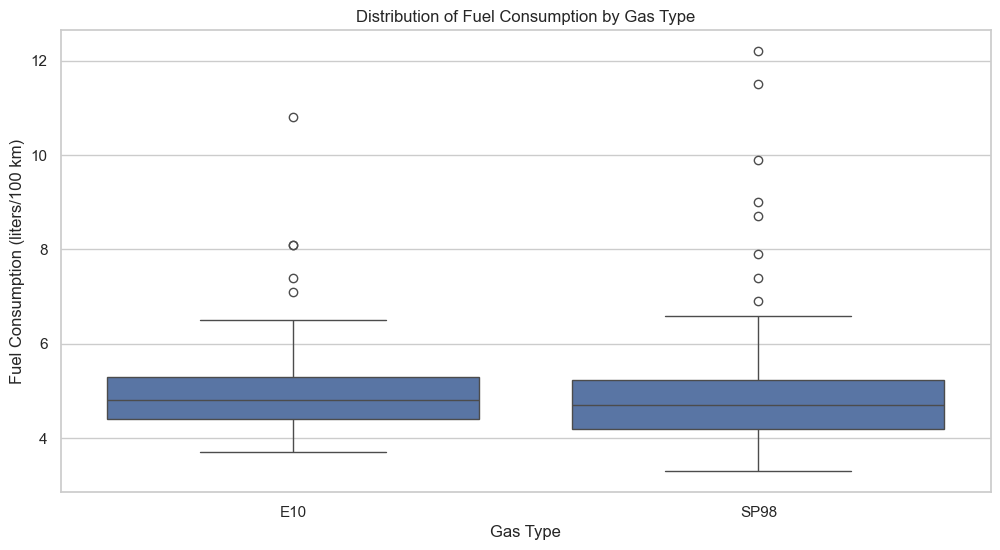

In [13]:
# Distribution of fuel consumption by gas type
plt.figure(figsize=(12, 6))
sns.boxplot(x='gas_type', y='consume', data=data)
plt.title('Distribution of Fuel Consumption by Gas Type')
plt.xlabel('Gas Type')
plt.ylabel('Fuel Consumption (liters/100 km)')
plt.show()

Distribution of Fuel Consumption by Gas Type:

The box plot shows the distribution of fuel consumption for each gas type. The medians are fairly close, but it's noteworthy to look at the spread and outliers for each type to understand the efficiency and consistency.

## Hypothesis Testing:

Hypothesis - How do factors like speed, outside temperature, and AC usage affect fuel consumption?

In [14]:
# Correlation Analysis for Hypothesis

# Selecting relevant columns for correlation analysis
correlation_columns = ['consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun']
correlation_data = data[correlation_columns]

# Calculating correlation matrix
correlation_matrix = correlation_data.corr()

# Displaying the correlation matrix
correlation_matrix['consume']

consume         1.000000
speed          -0.227866
temp_inside    -0.161470
temp_outside   -0.320811
AC              0.096591
rain            0.248118
sun            -0.170667
Name: consume, dtype: float64

### The correlation coefficients between fuel consumption and other variables are as follows:

Speed: There's a negative correlation (-0.228) suggesting that higher speeds might be associated with lower fuel consumption. This might reflect highway driving being more fuel-efficient than city driving.

Temp_Inside: A negative correlation (-0.161) indicates a slight decrease in fuel consumption with increasing interior temperature, but this relationship is not very strong.

Temp_Outside: A more substantial negative correlation (-0.321) suggests that lower outside temperatures are associated with higher fuel consumption. This could be due to the use of heating in colder weather.

AC (Air Conditioning): There's a positive correlation (0.097), indicating that the use of AC might lead to increased fuel consumption, but the effect seems relatively small.

Rain: There's a positive correlation (0.248), suggesting that driving in the rain is associated with higher fuel consumption, possibly due to slower speeds and increased resistance.

Sun: A negative correlation (-0.171) indicates that sunny conditions might be associated with slightly lower fuel consumption, although the effect is not very strong.

## Regression Model Evaluation:
The Linear Regression model built to predict fuel consumption based on variables like speed, outside temperature, AC usage, and gas type.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing data for the regression model

# Converting categorical variables to dummy variables
data_with_dummies = pd.get_dummies(data, columns=['gas_type', 'specials'], drop_first=True)

# Selecting predictor variables and the target variable
X = data_with_dummies.drop(columns=['consume', 'distance', 'temp_inside', 'refill liters', 'refill gas'])
y = data_with_dummies['consume']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying model evaluation metrics
mse, r2

(0.987434297749386, -0.1790463386371428)

## Insights

Mean Squared Error (MSE): Approximately 0.987. This metric indicates the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE suggests a better fit of the model to the data.

R² Score: Approximately -0.179. The R² score, or the coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, the negative R² score suggests that the model does not fit the data well and may not be suitable for making reliable predictions.

The negative R² score suggests that the linear regression model may not be the best fit for this dataset, or it may indicate that important variables or interactions between variables have not been captured adequately in the model.